# Exploratory Data Analysis

* Dataset taken from https://github.com/Tariq60/LIAR-PLUS

## 1. Import Libraries

In [19]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

TRAIN_PATH = "../data/raw/dataset/tsv/train2.tsv"
VAL_PATH = "../data/raw/dataset/tsv/val2.tsv"
TEST_PATH = "../data/raw/dataset/tsv/test2.tsv"

columns = ["id", "statement_json", "label", "statement", "subject", "speaker", "speaker_title", "state_info",
           "party_affiliation", "barely_true_count", "false_count", "half_true_count", "mostly_true_count",
           "pants_fire_count", "context", "justification"]



## 2. Read the dataset

In [2]:
train_df = pd.read_csv(TRAIN_PATH, sep="\t", names=columns)
val_df = pd.read_csv(VAL_PATH, sep="\t", names=columns)
test_df = pd.read_csv(TEST_PATH, sep="\t", names=columns)

In [3]:
print(f"Length of train set: {len(train_df)}")
print(f"Length of validation set: {len(val_df)}")
print(f"Length of test set: {len(test_df)}")

Length of train set: 10242
Length of validation set: 1284
Length of test set: 1267


In [4]:
train_df.head()

,id,statement_json,label,statement,subject,speaker,speaker_title,state_info,party_affiliation,barely_true_count,false_count,half_true_count,mostly_true_count,pants_fire_count,context,justification
0,0.0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,That's a premise that he fails to back up. Ann...
1,1.0,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,"Surovell said the decline of coal ""started whe..."
2,2.0,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,Obama said he would have voted against the ame...
3,3.0,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,The release may have a point that Mikulskis co...
4,4.0,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,"Crist said that the economic ""turnaround start..."


## 3. Data Cleaning

* Some of the most important coloumns are "label", "statement".
* Now we should check if any of them have null values.

In [5]:
print("Do we have empty strings in `label`?")
pd.isna(train_df["label"]).value_counts()

Do we have empty strings in `label`?


False    10240
True         2
Name: label, dtype: int64

* 2 entries without any label
* What exactly are those 2 entries?

In [6]:
train_df.loc[pd.isna(train_df["label"]), :].index

Int64Index([2143, 9377], dtype='int64')

In [7]:
train_df.loc[[2143]]


,id,statement_json,label,statement,subject,speaker,speaker_title,state_info,party_affiliation,barely_true_count,false_count,half_true_count,mostly_true_count,pants_fire_count,context,justification
2143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
train_df.loc[[9377]]

,id,statement_json,label,statement,subject,speaker,speaker_title,state_info,party_affiliation,barely_true_count,false_count,half_true_count,mostly_true_count,pants_fire_count,context,justification
9377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* All the coloumns of those 2 entries are blank
* Drop those 2 entries

In [9]:
train_df.dropna(subset=["label"], inplace=True)
len(train_df)

10240

## 4. Some Feature Analysis

### 4.1 Party Affiliation

republican                      4497
democrat                        3336
none                            1744
organization                     219
independent                      147
newsmaker                         56
libertarian                       40
activist                          39
journalist                        38
columnist                         35
talk-show-host                    26
state-official                    20
labor-leader                      11
tea-party-member                  10
business-leader                    9
green                              3
education-official                 2
liberal-party-canada               1
government-body                    1
Moderate                           1
democratic-farmer-labor            1
ocean-state-tea-party-action       1
constitution-party                 1
Name: party_affiliation, dtype: int64


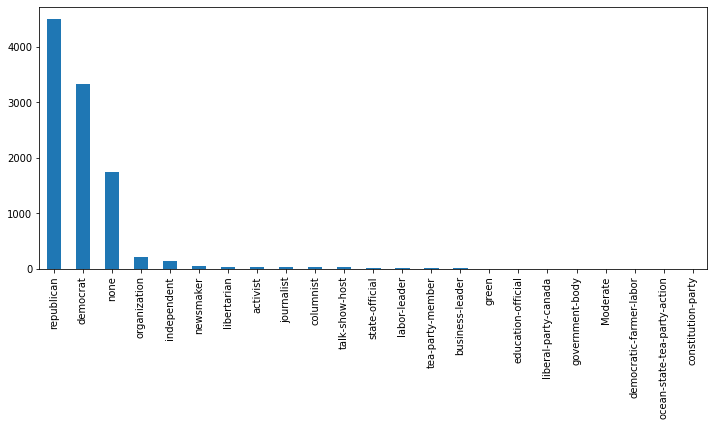

In [28]:
print(train_df["party_affiliation"].value_counts())

if not os.path.exists("./img"):
    os.makedirs("./img")

fig = plt.figure(figsize=(10, 6))
party_affil_plot = train_df["party_affiliation"].value_counts().plot.bar()
plt.tight_layout(pad=1)
plt.savefig("img/party_affil_plot.png", dpi=200)

### 4.2 States Stats

Texas             1009
Florida            997
Wisconsin          713
New York           657
Illinois           556
                  ... 
Qatar                1
Virginia             1
United Kingdom       1
China                1
Rhode Island         1
Name: state_info, Length: 84, dtype: int64


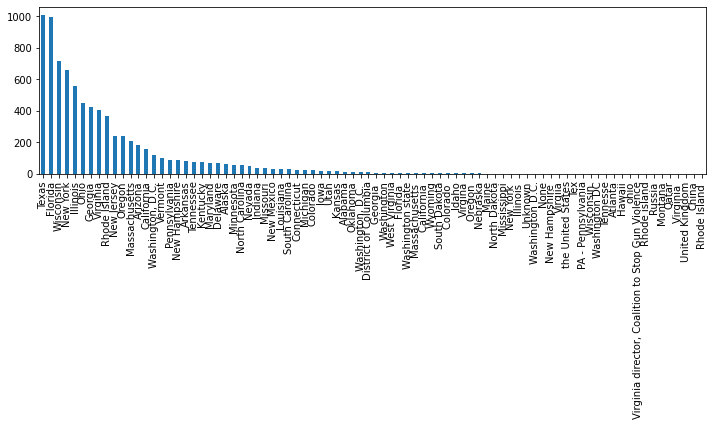

In [29]:
print(train_df["state_info"].value_counts())

fig = plt.figure(figsize=(10, 6))
state_info_plot = train_df["state_info"].value_counts().plot.bar()
plt.tight_layout(pad=1)
plt.savefig("img/state_info_plot.png", dpi=200)

* Apparently, we have a state_info entry with value as "Virginia director, Coalition to Stop Gun Violence".
It should be replaced with "Virginia" only

In [35]:
train_df[train_df["state_info"]=="Virginia director, Coalition to Stop Gun Violence"]

,id,statement_json,label,statement,subject,speaker,speaker_title,state_info,party_affiliation,barely_true_count,false_count,half_true_count,mostly_true_count,pants_fire_count,context,justification
5767,5779.0,10513.json,half-true,In states that have private-sale background ch...,"crime,guns,states,women",lori-haas,Virginia,"Virginia director, Coalition to Stop Gun Violence",activist,0.0,0.0,1.0,0.0,0.0,a news conference,Murphy said Floridas regulations on the payday...


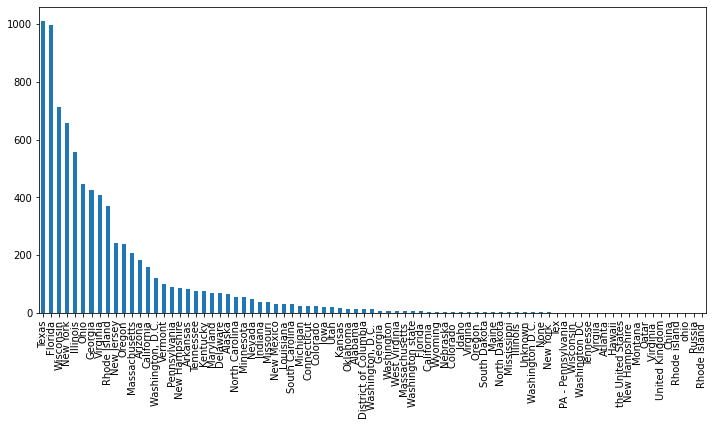

In [40]:
indx = train_df[train_df["state_info"]=="Virginia director, Coalition to Stop Gun Violence"].index[0]
train_df.loc[indx, "state_info"] = "Virginia"

fig = plt.figure(figsize=(10, 6))
state_info_plot = train_df["state_info"].value_counts().plot.bar()
plt.tight_layout(pad=1)
plt.savefig("img/state_info_plot.png", dpi=200)

### 4.3 Label Distribution

half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: label, dtype: int64


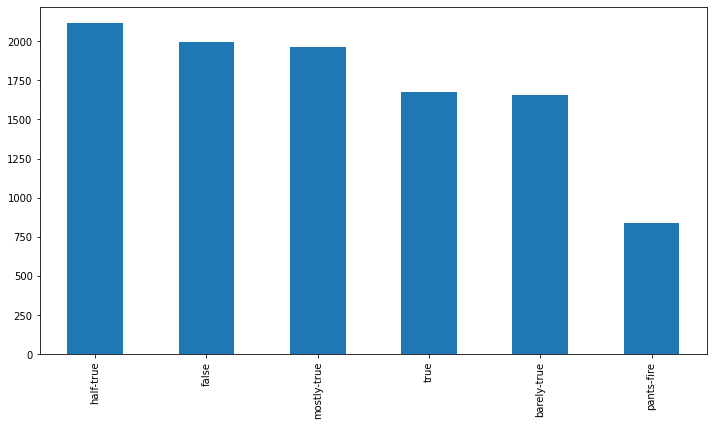

In [44]:
print(train_df["label"].value_counts())

fig = plt.figure(figsize=(10, 6))
label_stats_plot = train_df["label"].value_counts().plot.bar()
plt.tight_layout(pad=1)
plt.savefig("img/label_stats_plot.png", dpi=100)